# BPI (Batsman Performance Index) Predictor using machine learning
### using regression models to predict BPI for a batter by using training data to train the model and then passing test data to predict the outcomes

# Importing modules

In [1]:
import pandas as pd
import numpy as np
import re

# Reading csv files 

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('C:/Users/aksha/deliveries/deliveries.csv')

In [3]:
deliveries.head()

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0           1     legbyes          0              NaN            NaN     NaN  
1           0         NaN          0              NaN            NaN     NaN  
2           1       wides          0              NaN            NaN     NaN  
3           0         NaN          0              NaN            NaN     NaN  
4           0         NaN          0              NaN            NaN     NaN

In [4]:
matches.head()

id  season        city       date match_type player_of_match  \
0  335982    2008   Bangalore  4/18/2008     League     BB McCullum   
1  335983    2008  Chandigarh  4/19/2008     League      MEK Hussey   
2  335984    2008       Delhi  4/19/2008     League     MF Maharoof   
3  335985    2008      Mumbai  4/20/2008     League      MV Boucher   
4  335986    2008     Kolkata  4/20/2008     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkata Knight Riders  Royal Challengers Bangalore         field   
1          Chennai Super Kings          Chennai Super Kings           bat   
2             Rajasthan Royals             Rajasthan Royals           bat   
3  Royal Challengers Bangalore               Mumbai Indians           bat   
4              Deccan Chargers              Deccan Chargers           bat   

                        winner   result  result_margin  target_runs  \
0        Kolkata Knight Riders     runs          140.0        223.0   
1          Chennai Super Kings     runs           33.0        241.0   
2             Delhi Daredevils  wickets            9.0        130.0   
3  Royal Challengers Bangalore  wickets            5.0        166.0   
4        Kolkata Knight Riders  wickets            5.0        111.0   

   target_overs super_over method    umpire1         umpire2  
0          20.0          N    NaN  Asad Rauf     RE Koertzen  
1          20.0          N    NaN  MR Benson      SL Shastri  
2          20.0          N    NaN  Aleem Dar  GA Pratapkumar  
3          20.0          N    NaN   SJ Davis       DJ Harper  
4          20.0          N    NaN  BF Bowden     K Hariharan

# preprocessing the data

In [5]:
matches.rename(columns={'id': 'match_id'}, inplace=True)

In [6]:
#merging both the datasets using on condition
merged_df = deliveries.merge(matches, on='match_id')

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
merged_df.head()

match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  \
0           1     legbyes          0              NaN            NaN     NaN   
1           0         NaN          0              NaN            NaN     NaN   
2           1       wides          0              NaN            NaN     NaN   
3           0         NaN          0              NaN            NaN     NaN   
4           0         NaN          0              NaN            NaN     NaN   

   season       city       date match_type player_of_match  \
0    2008  Bangalore  4/18/2008     League     BB McCullum   
1    2008  Bangalore  4/18/2008     League     BB McCullum   
2    2008  Bangalore  4/18/2008     League     BB McCullum   
3    2008  Bangalore  4/18/2008     League     BB McCullum   
4    2008  Bangalore  4/18/2008     League     BB McCullum   

                   venue                        team1                  team2  \
0  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
1  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
2  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
3  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   
4  M Chinnaswamy Stadium  Royal Challengers Bangalore  Kolkata Knight Riders   

                   toss_winner toss_decision                 winner result  \
0  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
1  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
2  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
3  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   
4  Royal Challengers Bangalore         field  Kolkata Knight Riders   runs   

   result_margin  target_runs  target_overs super_over method    umpire1  \
0          140.0        223.0          20.0          N    NaN  Asad Rauf   
1          140.0        223.0          20.0          N    NaN  Asad Rauf   
2          140.0        223.0          20.0          N    NaN  Asad Rauf   
3          140.0        223.0          20.0          N    NaN  Asad Rauf   
4          140.0        223.0          20.0          N    NaN  Asad Rauf   

       umpire2  
0  RE Koertzen  
1  RE Koertzen  
2  RE Koertzen  
3  RE Koertzen  
4  RE Koertzen

In [9]:
list(merged_df['batting_team'].unique())

['Kolkata Knight Riders',
 'Royal Challengers Bangalore',
 'Chennai Super Kings',
 'Kings XI Punjab',
 'Rajasthan Royals',
 'Delhi Daredevils',
 'Mumbai Indians',
 'Deccan Chargers',
 'Kochi Tuskers Kerala',
 'Pune Warriors',
 'Sunrisers Hyderabad',
 'Rising Pune Supergiants',
 'Gujarat Lions',
 'Rising Pune Supergiant',
 'Delhi Capitals',
 'Punjab Kings',
 'Lucknow Super Giants',
 'Gujarat Titans',
 'Royal Challengers Bengaluru']

In [10]:
def clean_player_name(name):
    name = name.replace('.', '').strip()
    name = re.sub(r'\(.*?\)', '', name)   # remove roles like (c), (wk)
    name = name.replace('†', '').strip()
    return name

merged_df['batter'] = merged_df['batter'].apply(clean_player_name)
merged_df['non_striker'] = merged_df['non_striker'].apply(clean_player_name)
merged_df['bowler'] = merged_df['bowler'].apply(clean_player_name)

In [11]:
merged_df['is_legal_delivery'] = (~merged_df['extras_type'].isin(['wides', 'penalty'])).astype('int')

In [12]:
merged_df['extras_type'].value_counts()

extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
penalty       2
Name: count, dtype: int64

In [13]:
# removing super over stats from the dataset
merged_df = merged_df.query('inning < 3')

In [14]:
merged_df['extras_type'].value_counts()

extras_type
wides      8375
legbyes    3993
noballs    1065
byes        671
penalty       2
Name: count, dtype: int64

In [15]:
merged_df.query('extras_type == "noballs"')

match_id  inning           batting_team           bowling_team  over  \
239       335983       1    Chennai Super Kings        Kings XI Punjab     2   
939       335986       1        Deccan Chargers  Kolkata Knight Riders     0   
984       335986       1        Deccan Chargers  Kolkata Knight Riders     7   
1132      335986       2  Kolkata Knight Riders        Deccan Chargers    11   
1294      335987       1        Kings XI Punjab       Rajasthan Royals    19   
...          ...     ...                    ...                    ...   ...   
259855   1426307       1           Punjab Kings    Sunrisers Hyderabad    11   
259942   1426307       2    Sunrisers Hyderabad           Punjab Kings     4   
260058   1426309       1    Sunrisers Hyderabad  Kolkata Knight Riders     3   
260101   1426309       1    Sunrisers Hyderabad  Kolkata Knight Riders    10   
260687   1426311       2       Rajasthan Royals    Sunrisers Hyderabad    12   

        ball           batter               bowler          non_striker  \
239        2        ML Hayden                B Lee             PA Patel   
939        2  Y Venugopal Rao             AB Dinda         AC Gilchrist   
984        2     AC Gilchrist      Mohammad Hafeez            A Symonds   
1132       8       SC Ganguly            A Symonds            DJ Hussey   
1294       2        PP Chawla            SR Watson              WA Mota   
...      ...              ...                  ...                  ...   
259855     1       RR Rossouw  Nithish Kumar Reddy       P Simran Singh   
259942     5      RA Tripathi             HV Patel      Abhishek Sharma   
260058     3      RA Tripathi             VG Arora  Nithish Kumar Reddy   
260101     1        H Klaasen             CV Varun          RA Tripathi   
260687     2       SO Hetmyer           AK Markram          Dhruv Jurel   

        batsman_runs  extra_runs  total_runs extras_type  is_wicket  \
239                4           1           5     noballs          0   
939                0           1           1     noballs          0   
984                0           1           1     noballs          0   
1132               0           1           1     noballs          0   
1294               1           1           2     noballs          0   
...              ...         ...         ...         ...        ...   
259855             0           1           1     noballs          0   
259942             6           1           7     noballs          0   
260058             4           1           5     noballs          0   
260101             1           1           2     noballs          0   
260687             0           1           1     noballs          0   

       player_dismissed dismissal_kind fielder  season        city       date  \
239                 NaN            NaN     NaN    2008  Chandigarh  4/19/2008   
939                 NaN            NaN     NaN    2008     Kolkata  4/20/2008   
984                 NaN            NaN     NaN    2008     Kolkata  4/20/2008   
1132                NaN            NaN     NaN    2008     Kolkata  4/20/2008   
1294                NaN            NaN     NaN    2008      Jaipur  4/21/2008   
...                 ...            ...     ...     ...         ...        ...   
259855              NaN            NaN     NaN    2024   Hyderabad  5/19/2024   
259942              NaN            NaN     NaN    2024   Hyderabad  5/19/2024   
260058              NaN            NaN     NaN    2024   Ahmedabad  5/21/2024   
260101              NaN            NaN     NaN    2024   Ahmedabad  5/21/2024   
260687              NaN            NaN     NaN    2024     Chennai  5/24/2024   

         match_type  player_of_match  \
239          League       MEK Hussey   
939          League        DJ Hussey   
984          League        DJ Hussey   
1132         League        DJ Hussey   
1294         League        SR Watson   
...             ...              ...   
259855       League  Abhishek Sharma   


In [16]:
# aggregating batsman stats based on season, batting_team and batter by grouping the data w.r.t them
seasonal_stats = merged_df.groupby(['season', 'batting_team', 'batter']).agg(
    matches = ('match_id', 'nunique'),
    total_balls = ('is_legal_delivery', 'sum'),
    total_runs = ('batsman_runs', 'sum'),
    dot_balls = ('batsman_runs', lambda x:(x==0).sum()),
    ones = ('batsman_runs', lambda x:(x==1).sum()),
    twos = ('batsman_runs', lambda x:(x==2).sum()),
    threes = ('batsman_runs', lambda x:(x==3).sum()),
    fours = ('batsman_runs', lambda x:(x==4).sum()),
    sixes = ('batsman_runs', lambda x:(x==6).sum())
).reset_index()

In [17]:
seasonal_stats.query('batter == "V Kohli"')

season                 batting_team   batter  matches  total_balls  \
151     2008  Royal Challengers Bangalore  V Kohli       12          157   
302     2009  Royal Challengers Bangalore  V Kohli       13          219   
467     2010  Royal Challengers Bangalore  V Kohli       13          212   
646     2011  Royal Challengers Bangalore  V Kohli       16          460   
816     2012  Royal Challengers Bangalore  V Kohli       15          326   
973     2013  Royal Challengers Bangalore  V Kohli       16          457   
1102    2014  Royal Challengers Bangalore  V Kohli       14          294   
1233    2015  Royal Challengers Bangalore  V Kohli       16          386   
1371    2016  Royal Challengers Bangalore  V Kohli       16          640   
1513    2017  Royal Challengers Bangalore  V Kohli       10          252   
1648    2018  Royal Challengers Bangalore  V Kohli       14          381   
1791    2019  Royal Challengers Bangalore  V Kohli       14          328   
1924    2020  Royal Challengers Bangalore  V Kohli       15          384   
2070    2021  Royal Challengers Bangalore  V Kohli       15          339   
2250    2022  Royal Challengers Bangalore  V Kohli       16          294   
2424    2023  Royal Challengers Bangalore  V Kohli       14          457   
2596    2024  Royal Challengers Bengaluru  V Kohli       15          479   

      total_runs  dot_balls  ones  twos  threes  fours  sixes  
151          165         82    59     5       0     18      4  
302          246         98    84    13       0     22      8  
467          307         61   103    14       0     26     12  
646          557        193   178    30       1     55     16  
816          364        136   137    16       1     33     10  
973          634        176   170    35       2     64     22  
1102         359        114   127    19       2     23     16  
1233         505        148   153    34       2     35     23  
1371         973        184   291    56       2     84     38  
1513         308         95   107    20       1     23     11  
1648         530        125   166    24       0     52     18  
1791         464         97   150    26       0     46     13  
1924         466        116   194    54       2     23     11  
2070         405        134   145    14       2     43      9  
2250         341        127   117    18       4     32      8  
2424         639        146   210    35       1     65     16  
2596         741        166   198    32       1     62     38

In [18]:
# calculation of number of centuries, fifties and thirty plus scores by a batsman in each match 
no_of_30_50_100 = merged_df.groupby(['season', 'batting_team', 'batter', 'match_id']).agg(
    thirty_plus = ('batsman_runs', lambda x: 1 if (x.sum() >= 30) else 0),
    fifty_plus = ('batsman_runs', lambda x: 1 if (x.sum() >= 50 and x.sum() < 100) else 0),
    hundred_plus = ('batsman_runs', lambda x: 1 if (x.sum() >= 100) else 0)
).reset_index()

In [19]:
no_of_30_50_100.query('batter == "V Kohli"')

season                 batting_team   batter  match_id  thirty_plus  \
856      2008  Royal Challengers Bangalore  V Kohli    335982            0   
857      2008  Royal Challengers Bangalore  V Kohli    335985            0   
858      2008  Royal Challengers Bangalore  V Kohli    335992            0   
859      2008  Royal Challengers Bangalore  V Kohli    335996            0   
860      2008  Royal Challengers Bangalore  V Kohli    335998            0   
...       ...                          ...      ...       ...          ...   
16369    2024  Royal Challengers Bengaluru  V Kohli   1426290            1   
16370    2024  Royal Challengers Bengaluru  V Kohli   1426296            1   
16371    2024  Royal Challengers Bengaluru  V Kohli   1426300            0   
16372    2024  Royal Challengers Bengaluru  V Kohli   1426306            1   
16373    2024  Royal Challengers Bengaluru  V Kohli   1426310            1   

       fifty_plus  hundred_plus  
856             0             0  
857             0             0  
858             0             0  
859             0             0  
860             0             0  
...           ...           ...  
16369           0             0  
16370           1             0  
16371           0             0  
16372           0             0  
16373           0             0  

[244 rows x 7 columns]

In [20]:
# calculation of number of centuries, fifties and thirty plus scores by a batsman in each season
no_of_30_50_100 = no_of_30_50_100.groupby(['season', 'batting_team', 'batter']).agg(
    thirty_plus = ('thirty_plus', 'sum'),
    fifty_plus = ('fifty_plus', 'sum'),
    hundred_plus = ('hundred_plus', 'sum')
).reset_index()

In [21]:
no_of_30_50_100.query('batter == "V Kohli"')

season                 batting_team   batter  thirty_plus  fifty_plus  \
151     2008  Royal Challengers Bangalore  V Kohli            2           0   
302     2009  Royal Challengers Bangalore  V Kohli            2           1   
467     2010  Royal Challengers Bangalore  V Kohli            5           1   
646     2011  Royal Challengers Bangalore  V Kohli            9           4   
816     2012  Royal Challengers Bangalore  V Kohli            5           2   
973     2013  Royal Challengers Bangalore  V Kohli            9           6   
1102    2014  Royal Challengers Bangalore  V Kohli            6           2   
1233    2015  Royal Challengers Bangalore  V Kohli            9           3   
1371    2016  Royal Challengers Bangalore  V Kohli           12           7   
1513    2017  Royal Challengers Bangalore  V Kohli            4           4   
1648    2018  Royal Challengers Bangalore  V Kohli            9           4   
1791    2019  Royal Challengers Bangalore  V Kohli            5           2   
1924    2020  Royal Challengers Bangalore  V Kohli            7           3   
2070    2021  Royal Challengers Bangalore  V Kohli            7           3   
2250    2022  Royal Challengers Bangalore  V Kohli            5           2   
2424    2023  Royal Challengers Bangalore  V Kohli            9           6   
2596    2024  Royal Challengers Bengaluru  V Kohli           10           5   

      hundred_plus  
151              0  
302              0  
467              0  
646              0  
816              0  
973              0  
1102             0  
1233             0  
1371             4  
1513             0  
1648             0  
1791             1  
1924             0  
2070             0  
2250             0  
2424             2  
2596             1

In [22]:
seasonal_stats = seasonal_stats.merge(no_of_30_50_100, on=['season', 'batting_team', 'batter'], how='left')

In [23]:
seasonal_stats.head()

season         batting_team           batter  matches  total_balls  \
0    2008  Chennai Super Kings         A Mukund        1            1   
1    2008  Chennai Super Kings    CK Kapugedera        3           23   
2    2008  Chennai Super Kings        JA Morkel       10          163   
3    2008  Chennai Super Kings         JDP Oram        2           12   
4    2008  Chennai Super Kings  Joginder Sharma        2           11   

   total_runs  dot_balls  ones  twos  threes  fours  sixes  thirty_plus  \
0           0          1     0     0       0      0      0            0   
1          16         10    12     2       0      0      0            0   
2         241         63    62    10       1     18     14            3   
3          18          4     6     1       0      1      1            0   
4          16          3     6     0       0      1      1            0   

   fifty_plus  hundred_plus  
0           0             0  
1           0             0  
2           1             0  
3           0             0  
4           0             0

## Calculating the number of dismissals for each batsman

In [24]:
dismissals = pd.DataFrame(merged_df.groupby(['season'])['player_dismissed'].value_counts().reset_index())

In [25]:
dismissals.rename(columns={'player_dismissed':'batter', 'count':'dismissals'}, inplace=True)

In [26]:
seasonal_stats = seasonal_stats.merge(dismissals, on=['season', 'batter'], how='left')

In [27]:
seasonal_stats = seasonal_stats.replace(np.nan, 0)

In [28]:
seasonal_stats['dismissals'] = seasonal_stats['dismissals'].astype('int')

In [29]:
seasonal_stats = seasonal_stats.query('matches >= 7 and total_runs >= 50')

In [30]:
seasonal_stats

season         batting_team               batter  matches  total_balls  \
2       2008  Chennai Super Kings            JA Morkel       10          163   
10      2008  Chennai Super Kings             MS Dhoni       14          310   
12      2008  Chennai Super Kings             PA Patel       13          297   
14      2008  Chennai Super Kings          S Badrinath       11          130   
15      2008  Chennai Super Kings             S Vidyut        8          109   
...      ...                  ...                  ...      ...          ...   
2604    2024  Sunrisers Hyderabad            H Klaasen       15          280   
2608    2024  Sunrisers Hyderabad  Nithish Kumar Reddy       11          212   
2609    2024  Sunrisers Hyderabad           PJ Cummins       10           95   
2612    2024  Sunrisers Hyderabad        Shahbaz Ahmed       12          166   
2613    2024  Sunrisers Hyderabad              TM Head       15          296   

      total_runs  dot_balls  ones  twos  threes  fours  sixes  thirty_plus  \
2            241         63    62    10       1     18     14            3   
10           414        124   114    26       2     38     15            8   
12           302        166    92    12       0     42      3            3   
14           192         59    41     8       1     21      8            3   
15           145         55    30     5       1     21      3            2   
...          ...        ...   ...   ...     ...    ...    ...          ...   
2604         479         89   119    28       0     19     38            7   
2608         303         82    89    14       0     15     21            4   
2609         136         40    33     8       1      9      8            3   
2612         215         59    79    15       0      7     13            2   
2613         567        103    97    11       0     64     32            8   

      fifty_plus  hundred_plus  dismissals  
2              1             0           7  
10             2             0          10  
12             2             0          11  
14             2             0           6  
15             1             0           8  
...          ...           ...         ...  
2604           4             0          12  
2608           2             0           9  
2609           0             0           6  
2612           1             0           9  
2613           4             1          14  

[1040 rows x 16 columns]

### fixing the error where dismissals are getting bigger than matches

In [31]:
def fix_matches(row):
    if row['dismissals'] > row['matches']:
        return row['dismissals']
    else:
        return row['matches']

seasonal_stats['matches'] = seasonal_stats.apply(fix_matches, axis=1)

### feature engineering :- deriving new features from previous features 

In [32]:
seasonal_stats['Not_outs'] = seasonal_stats['matches'] - seasonal_stats['dismissals']
seasonal_stats['batting_average'] = round((seasonal_stats['total_runs']/seasonal_stats['dismissals']), 2)
seasonal_stats['strike_rate'] = round((seasonal_stats['total_runs']/seasonal_stats['total_balls'])*100, 2)
seasonal_stats['runs_fours(4s)%'] = round((seasonal_stats['fours']*4/seasonal_stats['total_runs'])*100, 2)
seasonal_stats['runs_sixes(6s)%'] = round((seasonal_stats['sixes']*6/seasonal_stats['total_runs'])*100, 2)
seasonal_stats['boundary_runs(%)'] = round(((seasonal_stats['fours']*4 + seasonal_stats['sixes']*6)/seasonal_stats['total_runs'])*100, 2)
seasonal_stats['dot_balls(%)'] = round((seasonal_stats['dot_balls']/seasonal_stats['total_balls'])*100, 2)

### Calculating performance index (Hussey Index, Deep Player Performance Index and Batsman Performance Index

In [33]:
seasonal_stats['Hussey_Index'] = seasonal_stats['batting_average'] + seasonal_stats['strike_rate']
seasonal_stats['DPPI'] = round((seasonal_stats['batting_average'] * seasonal_stats['strike_rate'])/100, 2)
seasonal_stats['BPI'] = round((seasonal_stats['strike_rate']*0.3 + 
                              seasonal_stats['Not_outs']*0.1 +
                              seasonal_stats['hundred_plus']*0.05 +
                              seasonal_stats['fifty_plus']*0.15 +
                              seasonal_stats['batting_average']*0.2 + 
                              seasonal_stats['boundary_runs(%)']*0.2),2)

In [34]:
seasonal_stats.query('batter == "V Kohli" and season == 2016')

season                 batting_team   batter  matches  total_balls  \
1371    2016  Royal Challengers Bangalore  V Kohli       16          640   

      total_runs  dot_balls  ones  twos  threes  fours  sixes  thirty_plus  \
1371         973        184   291    56       2     84     38           12   

      fifty_plus  hundred_plus  dismissals  Not_outs  batting_average  \
1371           7             4          12         4            81.08   

      strike_rate  runs_fours(4s)%  runs_sixes(6s)%  boundary_runs(%)  \
1371       152.03            34.53            23.43             57.97   

      dot_balls(%)  Hussey_Index    DPPI    BPI  
1371         28.75        233.11  123.27  75.07

In [35]:
seasonal_stats.to_csv('C:/Users/aksha/Cricket_data_analytics/data/seasonal_stats', index=False)
seasonal_stats.to_csv('C:/Users/aksha/Cricket_data_analytics/data/seasonal_stats.csv', index=False)

In [36]:
new_df = seasonal_stats.drop(columns=['season', 'batting_team', 'batter'])

### Correlation Heatmap

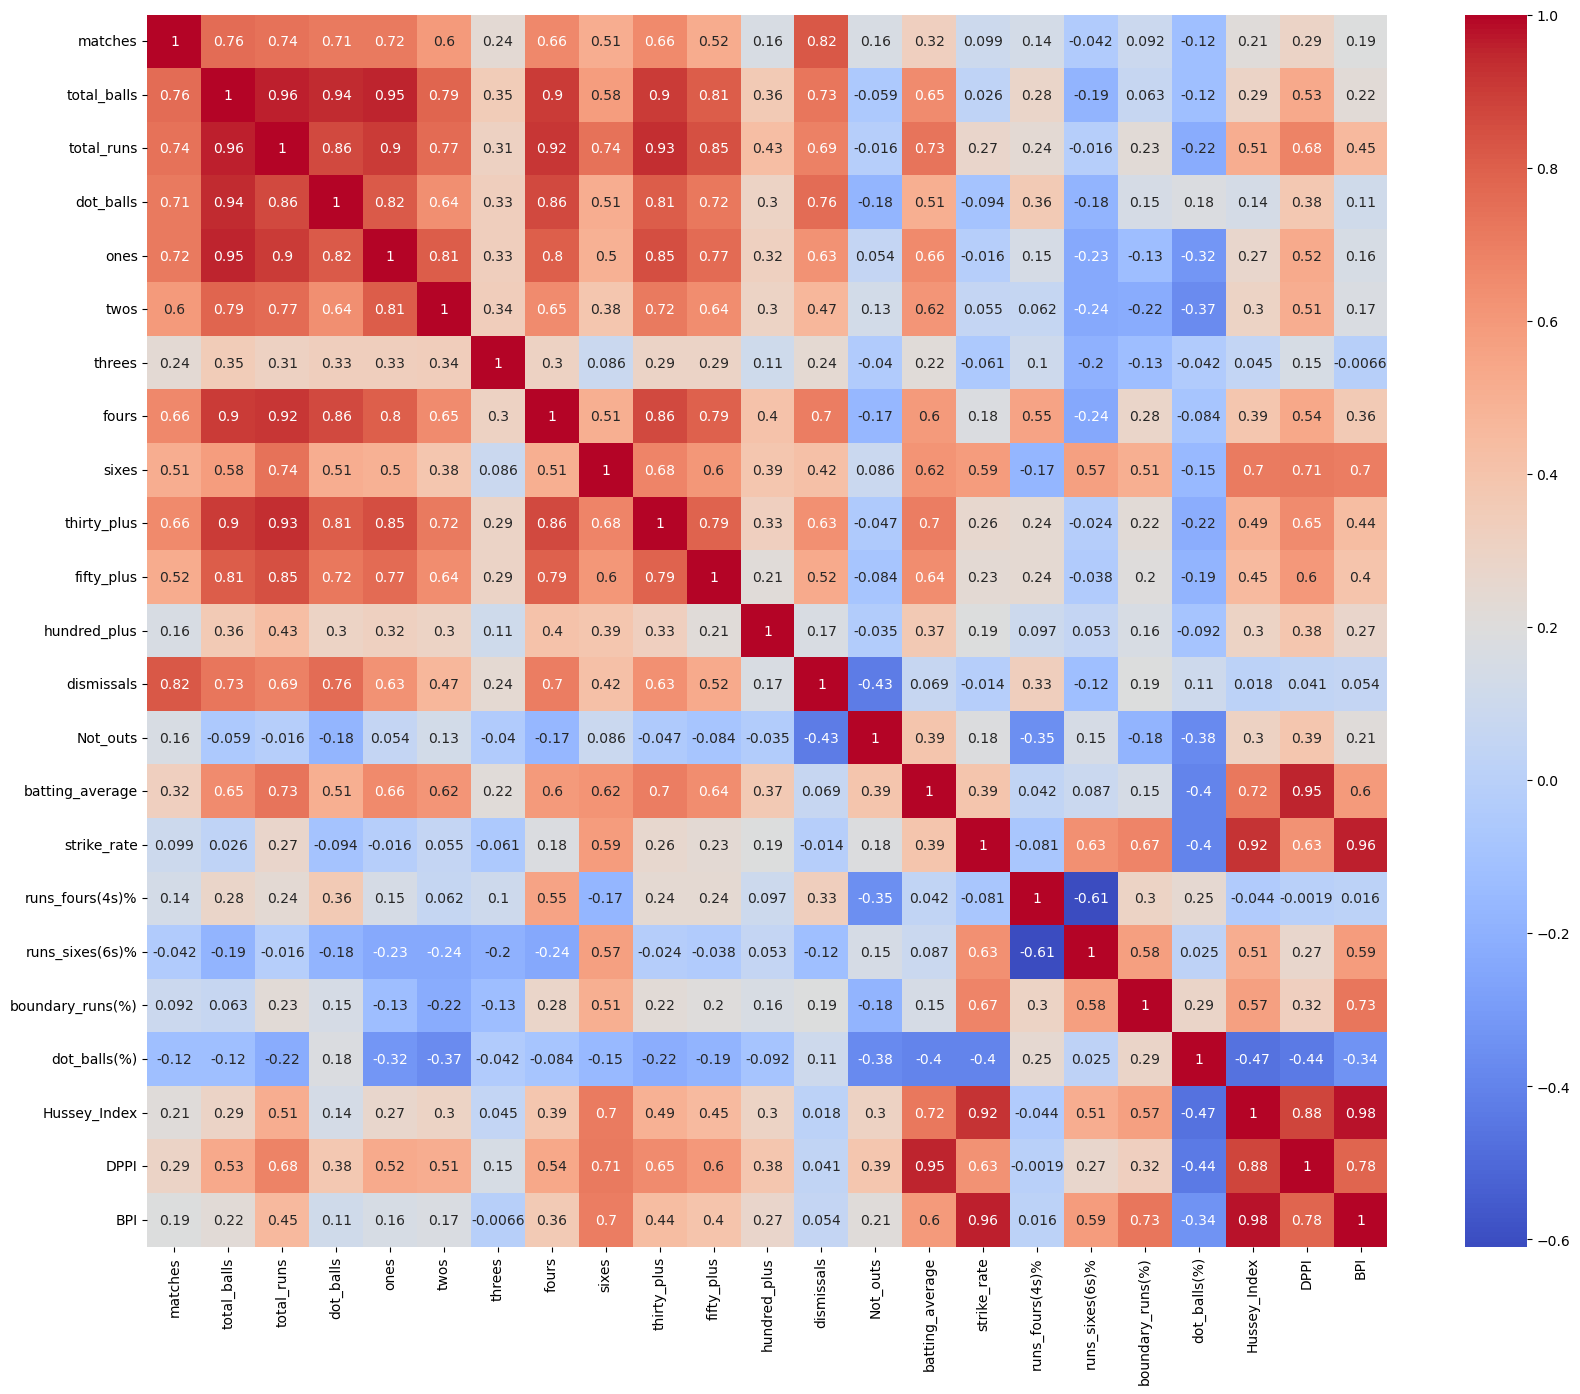

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,16))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Feature Selection

In [38]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2
X = new_df.drop(columns = ['BPI'])
y = new_df[['BPI']]

In [39]:
X.head()

matches  total_balls  total_runs  dot_balls  ones  twos  threes  fours  \
2        10          163         241         63    62    10       1     18   
10       14          310         414        124   114    26       2     38   
12       13          297         302        166    92    12       0     42   
14       11          130         192         59    41     8       1     21   
15        8          109         145         55    30     5       1     21   

    sixes  thirty_plus  fifty_plus  hundred_plus  dismissals  Not_outs  \
2      14            3           1             0           7         3   
10     15            8           2             0          10         4   
12      3            3           2             0          11         2   
14      8            3           2             0           6         5   
15      3            2           1             0           8         0   

    batting_average  strike_rate  runs_fours(4s)%  runs_sixes(6s)%  \
2             34.43       147.85            29.88            34.85   
10            41.40       133.55            36.71            21.74   
12            27.45       101.68            55.63             5.96   
14            32.00       147.69            43.75            25.00   
15            18.12       133.03            57.93            12.41   

    boundary_runs(%)  dot_balls(%)  Hussey_Index   DPPI  
2              64.73         38.65        182.28  50.90  
10             58.45         40.00        174.95  55.29  
12             61.59         55.89        129.13  27.91  
14             68.75         45.38        179.69  47.26  
15             70.34         50.46        151.15  24.11

In [40]:
(X < 0).sum().sum()

0

In [41]:
X_new = SelectKBest(score_func=f_regression, k='all').fit(X, y)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
X_new_scores = pd.DataFrame(X_new.scores_)
X_new_features = pd.DataFrame(X.columns)

In [43]:
features = pd.concat([X_new_features, X_new_scores], axis=1)
features.columns=['features', 'scores']

### Using Feature selection method to select k best features

In [44]:
features.nlargest(15, 'scores')

features        scores
20      Hussey_Index  21291.252132
15       strike_rate  11976.996549
21              DPPI   1651.065785
18  boundary_runs(%)   1156.786182
8              sixes    999.322350
14   batting_average    572.607584
17   runs_sixes(6s)%    552.018410
2         total_runs    268.529086
9        thirty_plus    242.889935
10        fifty_plus    198.844885
7              fours    156.277855
19      dot_balls(%)    134.830145
11      hundred_plus     84.046359
1        total_balls     54.140050
13          Not_outs     48.193309

In [45]:
import pandas as pd
# Calculate correlation matrix
correlation_matrix = new_df.corr()
correlation_matrix["BPI"].sort_values(ascending=False).head(12)

BPI                 1.000000
Hussey_Index        0.976480
strike_rate         0.959294
DPPI                0.783577
boundary_runs(%)    0.725990
sixes               0.700363
batting_average     0.596257
runs_sixes(6s)%     0.589218
total_runs          0.453353
thirty_plus         0.435461
fifty_plus          0.400959
fours               0.361740
Name: BPI, dtype: float64

### Detecting Outliers inside the data

In [46]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5*IQR)) | (X > (Q3 + 1.5*IQR)))
outliers.sum()

matches              0
total_balls          7
total_runs          10
dot_balls            8
ones                12
twos                20
threes              52
fours               10
sixes               25
thirty_plus         18
fifty_plus          24
hundred_plus        82
dismissals           0
Not_outs            24
batting_average     25
strike_rate         24
runs_fours(4s)%      2
runs_sixes(6s)%     11
boundary_runs(%)    16
dot_balls(%)        14
Hussey_Index        14
DPPI                42
dtype: int64

In [47]:
X[X['DPPI'] > X['DPPI'].quantile(0.95)]
X[X['hundred_plus'] > X['hundred_plus'].quantile(0.95)]

matches  total_balls  total_runs  dot_balls  ones  twos  threes  fours  \
633        12          332         608        134    98     9       0     57   
1371       16          640         973        184   291    56       2     84   
1429       10          288         420        101   119    18       1     40   
1545       15          359         555        142   128    18       0     44   
1839       17          427         618        120   196    35       2     67   
2170       14          455         616        168   203    25       1     45   
2220       17          579         863        247   185    33       2     84   
2315       17          564         890        168   244    48       4     85   
2424       14          457         639        146   210    35       1     65   
2568       11          255         359        102    91    23       2     36   

      sixes  thirty_plus  fifty_plus  hundred_plus  dismissals  Not_outs  \
633      44            8           3             2           9         3   
1371     38           12           7             4          12         4   
1429     17            4           2             2           7         3   
1545     35            7           2             2          14         1   
1839     13            9           4             2          14         3   
2170     30            8           4             2          12         2   
2220     45           11           4             4          15         2   
2315     33           13           4             3          15         2   
2424     16            9           6             2          12         2   
2568     12            4           0             2           9         2   

      batting_average  strike_rate  runs_fours(4s)%  runs_sixes(6s)%  \
633             67.56       183.13            37.50            43.42   
1371            81.08       152.03            34.53            23.43   
1429            60.00       145.83            38.10            24.29   
1545            39.64       154.60            31.71            37.84   
1839            44.14       144.73            43.37            12.62   
2170            51.33       135.38            29.22            29.22   
2220            57.53       149.05            38.93            31.29   
2315            59.33       157.80            38.20            22.25   
2424            53.25       139.82            40.69            15.02   
2568            39.89       140.78            40.11            20.06   

      boundary_runs(%)  dot_balls(%)  Hussey_Index    DPPI  
633              80.92         40.36        250.69  123.72  
1371             57.97         28.75        233.11  123.27  
1429             62.38         35.07        205.83   87.50  
1545             69.55         39.55        194.24   61.28  
1839             55.99         28.10        188.87   63.88  
2170             58.44         36.92        186.71   69.49  
2220             70.22         42.66        206.58   85.75  
2315             60.45         29.79        217.13   93.62  
2424             55.71         31.95        193.07   74.45  
2568             60.17         40.00        180.67   56.16

#### Random Forest Regressor :- Using feature importances to select important features

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 200, random_state=42)
rf_model.fit(X, y)
importance = pd.DataFrame({'Features': X.columns,
                          'importance': rf_model.feature_importances_}).sort_values(by='importance', ascending=False)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [49]:
importance.head(10)

Features  importance
20      Hussey_Index    0.914318
15       strike_rate    0.055538
18  boundary_runs(%)    0.023752
19      dot_balls(%)    0.000934
5               twos    0.000678
17   runs_sixes(6s)%    0.000502
21              DPPI    0.000483
16   runs_fours(4s)%    0.000450
4               ones    0.000448
8              sixes    0.000444

#### Selecting the features and then splitting the data into train and test data

In [50]:
features = importance['Features'].tolist()[0:11]

targets = ['BPI']

train = seasonal_stats.query('season < 2022')
test = seasonal_stats.query('season >= 2022')

X_train, y_train = train[features], train[targets]
X_test, y_test = test[features], test[targets]

#### Using scaling (Standardization) to scale the data and then checking the score of the model

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

rf_model = RandomForestRegressor(n_estimators = 200, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_model.score(X_test_scaled, y_test)

0.9841514061415169

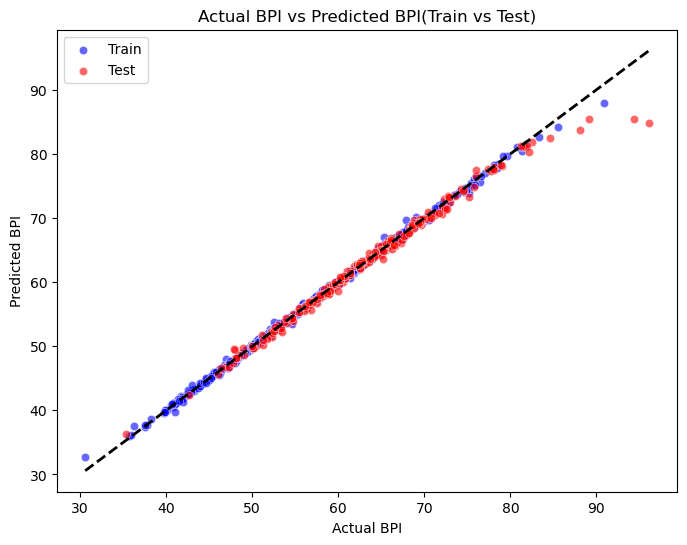

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Make predictions
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

plt.figure(figsize=(8,6))

# Train data
sns.scatterplot(x=y_train, y=y_train_pred.ravel(), color='blue', label='Train', alpha=0.6)

# Test data
sns.scatterplot(x=y_test, y=y_test_pred.ravel(), color='red', label='Test', alpha=0.6)

# Reference line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.xlabel("Actual BPI")
plt.ylabel("Predicted BPI")
plt.title("Actual BPI vs Predicted BPI(Train vs Test)")
plt.legend()
plt.show()

In [53]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_model.score(X_test_scaled, y_test)

0.9799984809397295

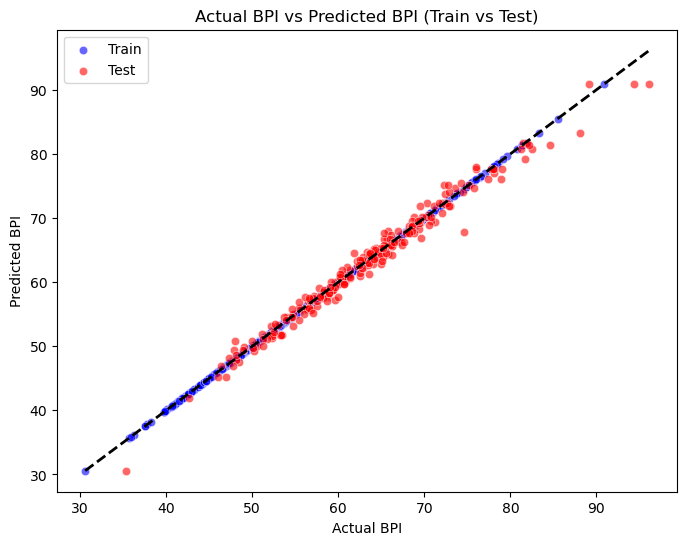

In [54]:
# Make predictions
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)

plt.figure(figsize=(8,6))

# Train data
sns.scatterplot(x=y_train, y=y_train_pred.ravel(), color='blue', label='Train', alpha=0.6)

# Test data
sns.scatterplot(x=y_test, y=y_test_pred.ravel(), color='red', label='Test', alpha=0.6)

# Reference line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.xlabel("Actual BPI")
plt.ylabel("Predicted BPI")
plt.title("Actual BPI vs Predicted BPI (Train vs Test)")
plt.legend()
plt.show()

In [55]:
et_model = ExtraTreeRegressor(random_state=42)
et_model.fit(X_train_scaled, y_train)
et_model.score(X_test_scaled, y_test)

0.9734914060217823

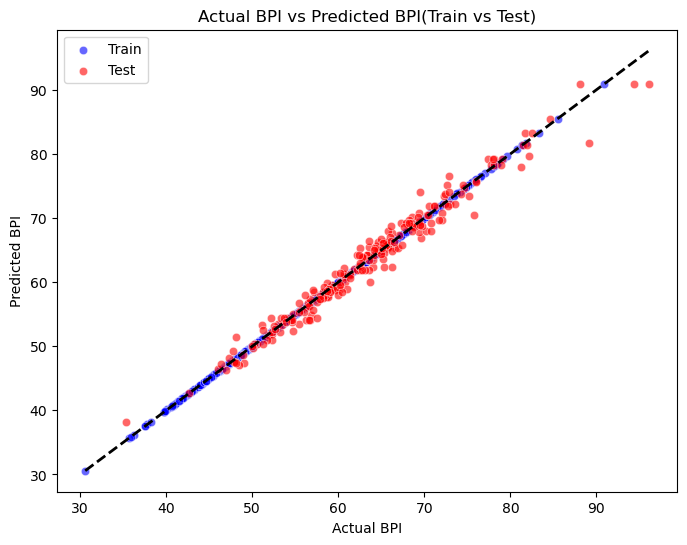

In [56]:
# Make predictions
y_train_pred = et_model.predict(X_train_scaled)
y_test_pred = et_model.predict(X_test_scaled)

plt.figure(figsize=(8,6))

# Train data
sns.scatterplot(x=y_train, y=y_train_pred.ravel(), color='blue', label='Train', alpha=0.6)

# Test data
sns.scatterplot(x=y_test, y=y_test_pred.ravel(), color='red', label='Test', alpha=0.6)

# Reference line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.xlabel("Actual BPI")
plt.ylabel("Predicted BPI")
plt.title("Actual BPI vs Predicted BPI(Train vs Test)")
plt.legend()
plt.show()

In [57]:
from xgboost import XGBRegressor

In [58]:
xgb_model = XGBRegressor(n_estimators = 200, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_model.score(X_test_scaled, y_test)

0.9802587592989187

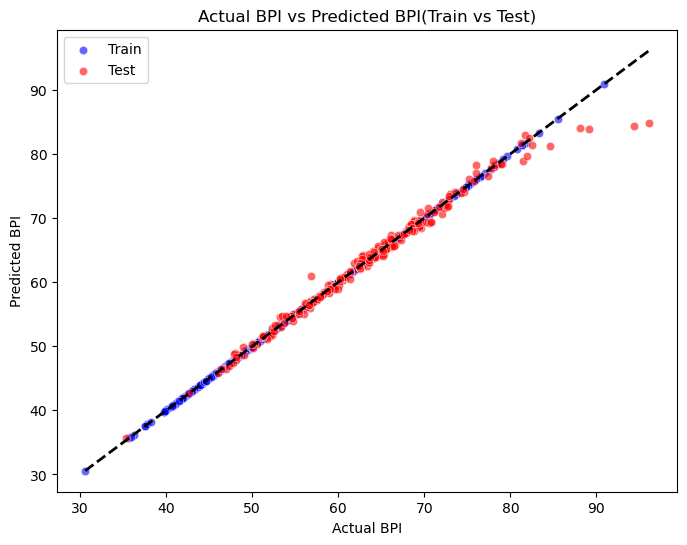

In [59]:
# Make predictions
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

plt.figure(figsize=(8,6))

# Train data
sns.scatterplot(x=y_train, y=y_train_pred.ravel(), color='blue', label='Train', alpha=0.6)

# Test data
sns.scatterplot(x=y_test, y=y_test_pred.ravel(), color='red', label='Test', alpha=0.6)

# Reference line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.xlabel("Actual BPI")
plt.ylabel("Predicted BPI")
plt.title("Actual BPI vs Predicted BPI(Train vs Test)")
plt.legend()
plt.show()

In [60]:
import joblib
joblib.dump(rf_model, 'C:/Users/aksha/Cricket_data_analytics/models/rf_model.joblib')
joblib.dump(dt_model, 'C:/Users/aksha/Cricket_data_analytics/models/dt_model.joblib')
joblib.dump(et_model, 'C:/Users/aksha/Cricket_data_analytics/models/et_model.joblib')
joblib.dump(xgb_model, 'C:/Users/aksha/Cricket_data_analytics/models/xgb_model.joblib')

['C:/Users/aksha/Cricket_data_analytics/models/xgb_model.joblib']

In [61]:
joblib.dump(scaler, 'C:/Users/aksha/Cricket_data_analytics/models/scaler.joblib')

['C:/Users/aksha/Cricket_data_analytics/models/scaler.joblib']

In [62]:
seasonal_stats.query('batter == "MS Dhoni"')['total_balls'].sum()

3812

In [63]:
pd.set_option('display.max_rows', None)
msd_2024_df = merged_df.query('batter == "MS Dhoni" and season == 2024')[['batsman_runs', 'extra_runs', 'is_legal_delivery']]

In [64]:
merged_df.query('batter == "MS Dhoni"')['ball'].count()

3947

In [65]:
seasonal_stats.columns

Index(['season', 'batting_team', 'batter', 'matches', 'total_balls',
       'total_runs', 'dot_balls', 'ones', 'twos', 'threes', 'fours', 'sixes',
       'thirty_plus', 'fifty_plus', 'hundred_plus', 'dismissals', 'Not_outs',
       'batting_average', 'strike_rate', 'runs_fours(4s)%', 'runs_sixes(6s)%',
       'boundary_runs(%)', 'dot_balls(%)', 'Hussey_Index', 'DPPI', 'BPI'],
      dtype='object')

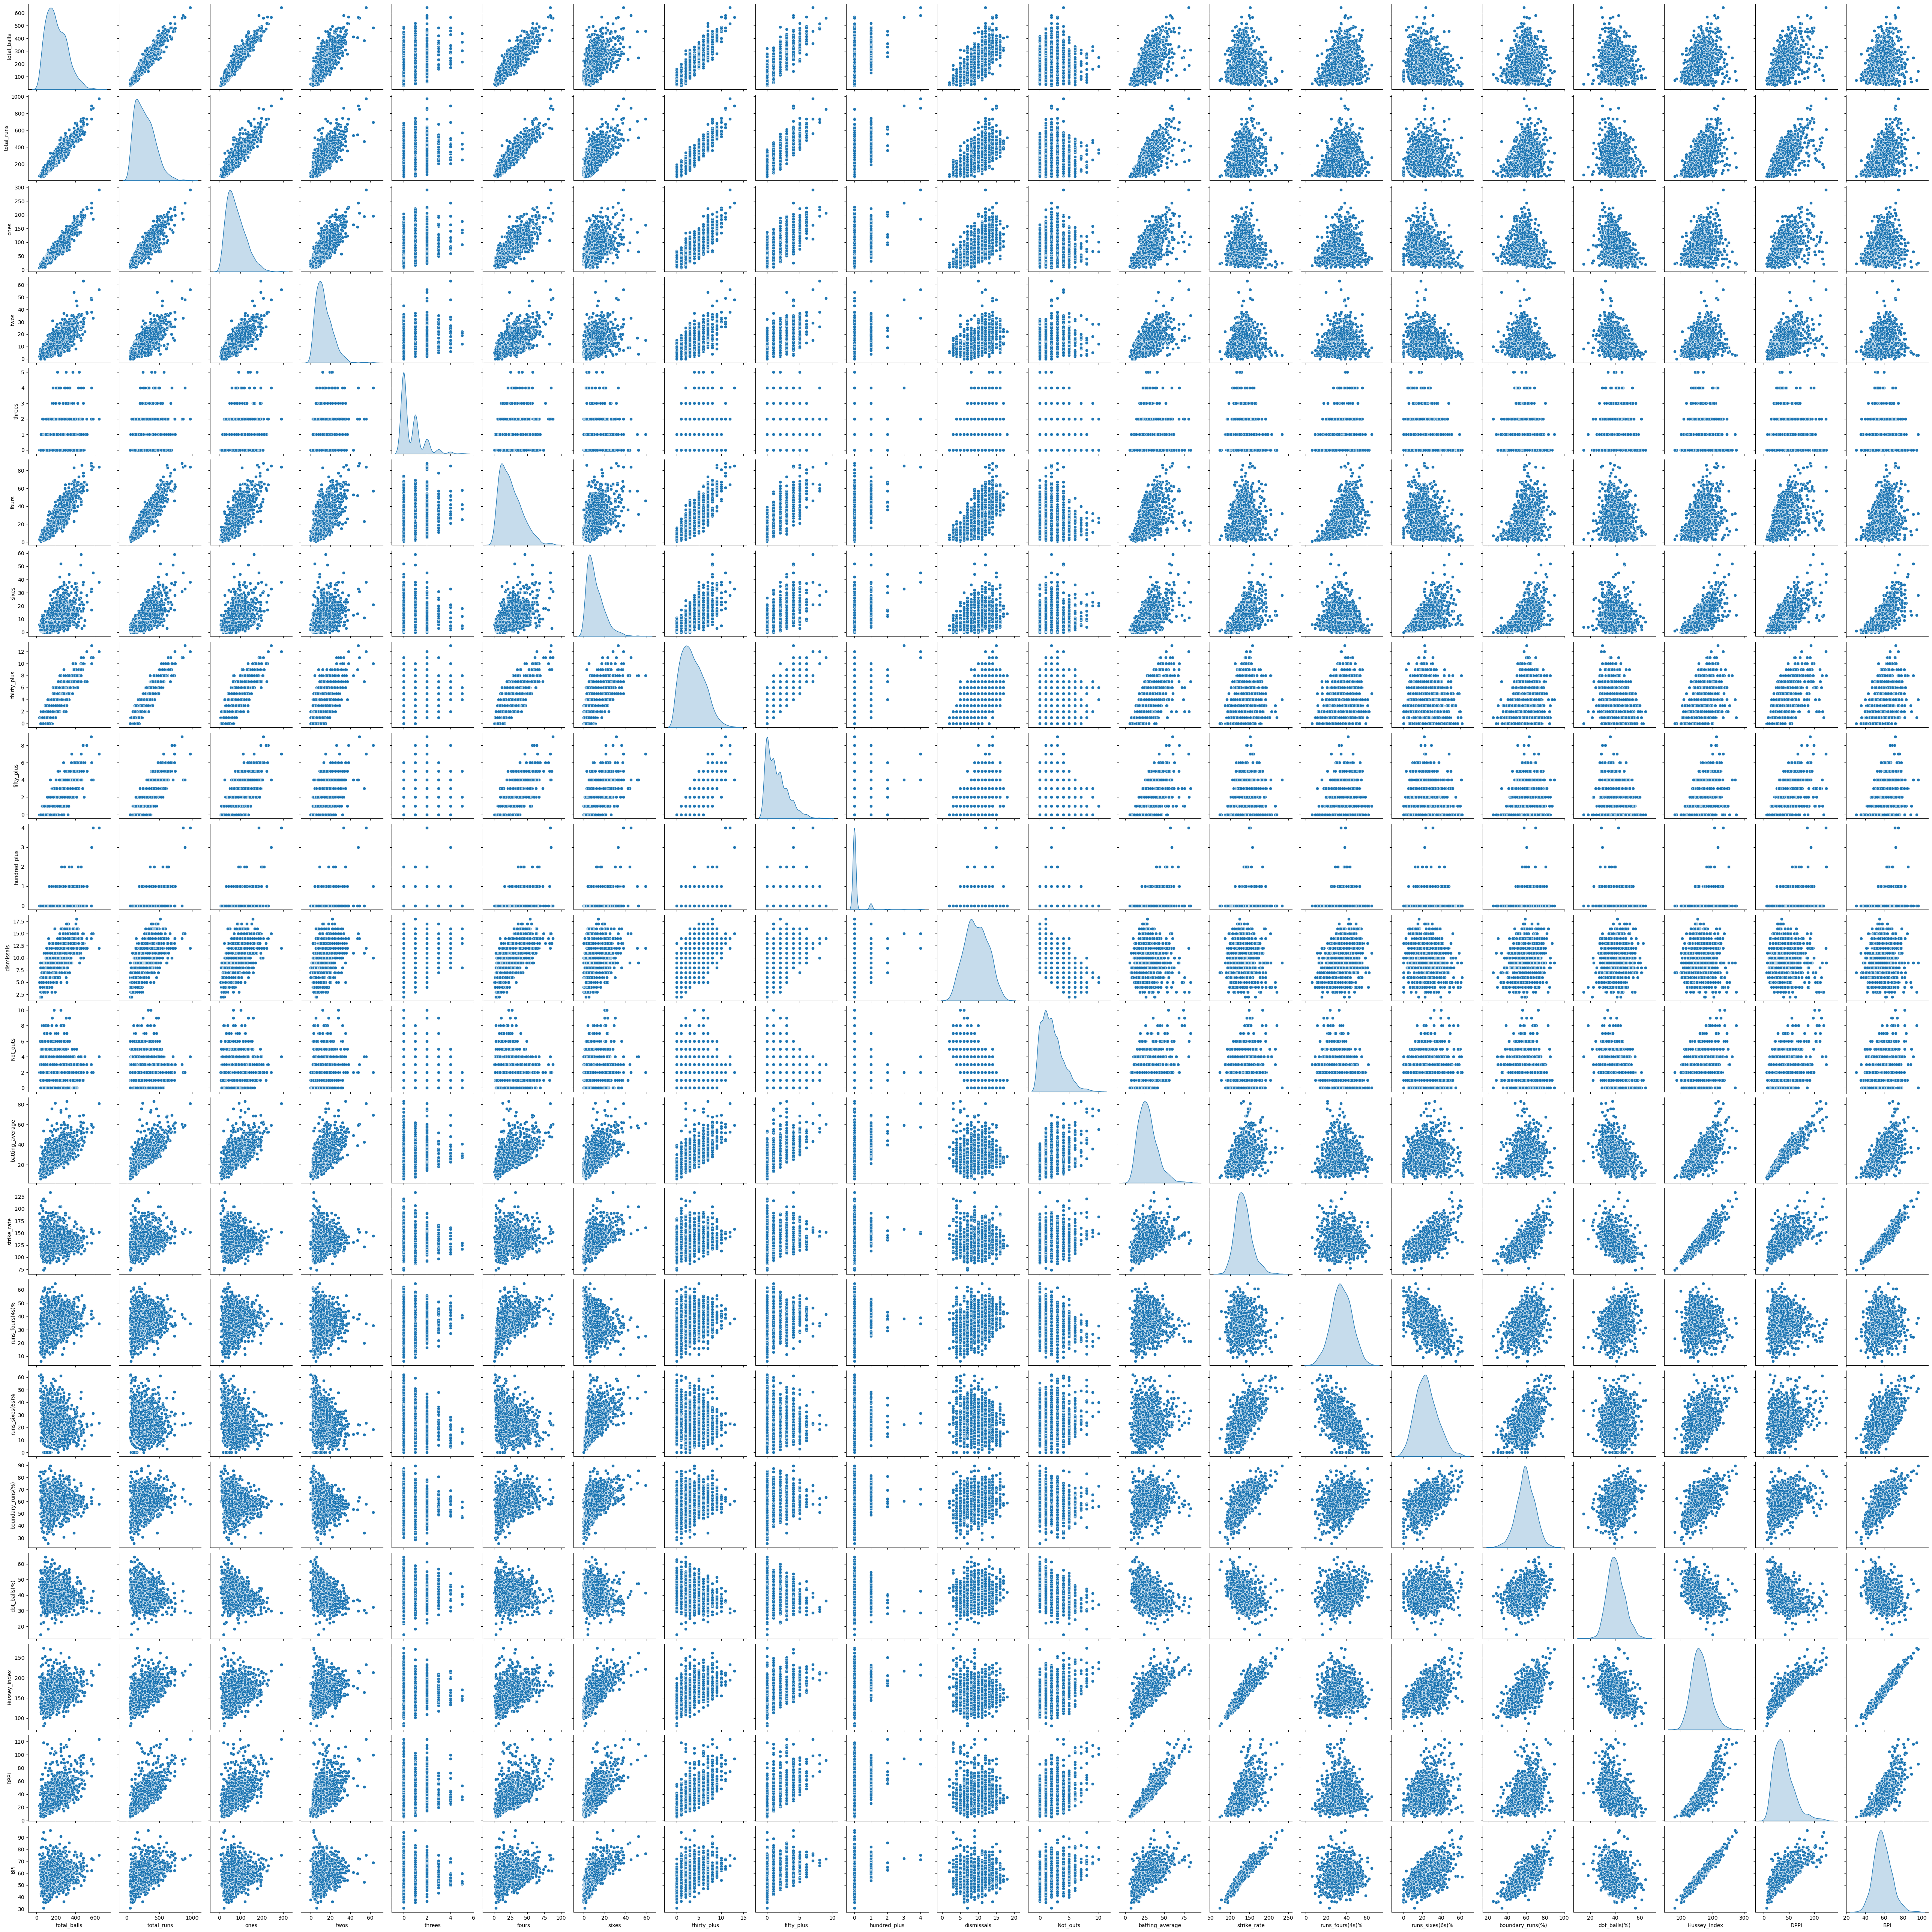

In [68]:
import seaborn as sns
features = ['total_balls', 'total_runs', 'ones', 'twos', 'threes', 'fours', 'sixes',
       'thirty_plus', 'fifty_plus', 'hundred_plus', 'dismissals', 'Not_outs',
       'batting_average', 'strike_rate', 'runs_fours(4s)%', 'runs_sixes(6s)%',
       'boundary_runs(%)', 'dot_balls(%)', 'Hussey_Index', 'DPPI']
sns.pairplot(seasonal_stats[features + ['BPI']], diag_kind='kde')